In [1]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [8]:
# split data in a new folder named data-split
splitfolders.ratio("C:/Users/exam10/Documents/BloodCell/bccd_wbc", output="C:/Users/exam10/Documents/BloodCell/bccd_wbc/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

Copying files: 1400 files [00:12, 110.07 files/s]


In [9]:
datagen = ImageDataGenerator()

In [10]:
# define classes name
class_names = ['lymphocyte','monocyte']

In [11]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/exam10/Documents/BloodCell/bccd_wbc/data-split/train/", 
    classes = class_names,
    target_size=(300, 300),  
    batch_size=32, 
    class_mode="binary", 
)

Found 978 images belonging to 2 classes.


In [12]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/exam10/Documents/BloodCell/bccd_wbc/data-split/val/", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 280 images belonging to 2 classes.


In [13]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/exam10/Documents/BloodCell/bccd_wbc/data-split/test/", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 142 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
model_history =model.fit(train_generator, validation_data=valid_generator, epochs=5, batch_size=32)

Epoch 1/5
31/31 [==============================] - 49s 2s/step - loss: 304.2744 - accuracy: 0.5164 - val_loss: 0.6920 - val_accuracy: 0.4786
Epoch 2/5
31/31 [==============================] - 43s 1s/step - loss: 0.6892 - accuracy: 0.5225 - val_loss: 0.6859 - val_accuracy: 0.4714
Epoch 3/5
31/31 [==============================] - 42s 1s/step - loss: 0.6864 - accuracy: 0.5174 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
31/31 [==============================] - 41s 1s/step - loss: 0.6932 - accuracy: 0.5153 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
31/31 [==============================] - 44s 1s/step - loss: 0.6933 - accuracy: 0.4826 - val_loss: 0.6932 - val_accuracy: 0.5000


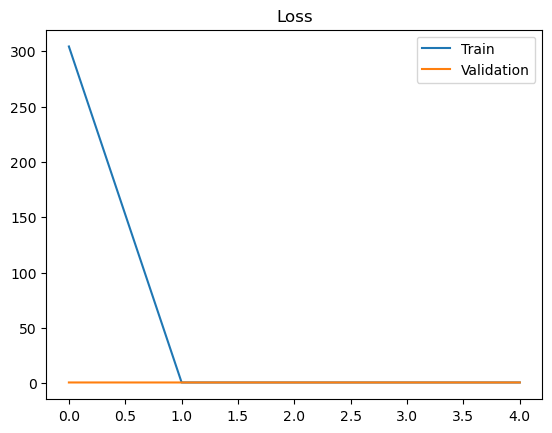

In [16]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

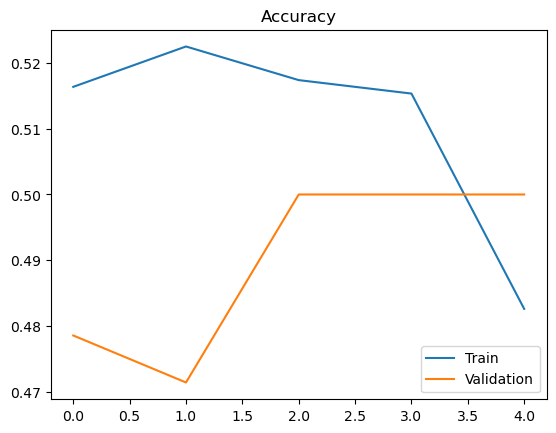

In [17]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

5/5 [==============================] - 2s 324ms/step - loss: 0.6932 - accuracy: 0.5000
The test loss is:  0.6931520700454712
The best accuracy is:  50.0


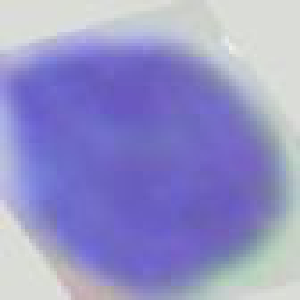

In [21]:
img = tf.keras.preprocessing.image.load_img('C:/Users/exam10/Documents/BloodCell/bccd_wbc/data-split/test/lymphocyte/1618.jpg', target_size=(300, 300))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [22]:
# generate predictions for samples
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("lymphocyte")
else:
    print("monocyte")

1/1 [==============================] - 0s 145ms/step
monocyte
